In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = r"D:\garbage for classification\train"
validation_dir = r"D:\garbage for classification\val"

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescaling for validation
validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Flow from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 2991 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [8]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Load the base model with pre-trained weights
base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Add custom layers on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\ROHAN\AppData\Local\Temp\ipykernel_2932\2315545532.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ ?                           │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [9]:
# Callbacks for early stopping and model checkpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('garbage_detection_model.keras', save_best_only=True, monitor='val_loss')

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/30


C:\Users\ROHAN\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 95s 888ms/step - accuracy: 0.9288 - loss: 0.3331 - val_accuracy: 0.9531 - val_loss: 0.2506
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 63s 646ms/step - accuracy: 0.9572 - loss: 0.1296 - val_accuracy: 0.8906 - val_loss: 0.3387
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 65s 669ms/step - accuracy: 0.9634 - loss: 0.0958 - val_accuracy: 0.9062 - val_loss: 0.3599
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 63s 640ms/step - accuracy: 0.9589 - loss: 0.1066 - val_accuracy: 0.9375 - val_loss: 0.2663
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 63s 640ms/step - accuracy: 0.9665 - loss: 0.1165 - val_accuracy: 0.9375 - val_loss: 0.2847
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 65s 665ms/step - accuracy: 0.9744 - loss: 0.0720 - val_accuracy: 0.9062 - val_loss: 0.2885


C:\Users\ROHAN\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


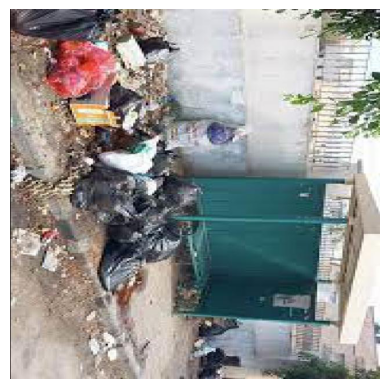

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
The image is classified as: garbage


In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt

# Function to load an image from a local path
def load_image(img_path):
    img = Image.open(img_path)
    return img

# Function to preprocess the image
def preprocess_image(img):
    img = img.resize((150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array

# Function to predict image class
def predict_image_class(model, img_array):
    prediction = model.predict(img_array)
    
    if prediction[0] < 0.5:
        return "clean"
    else:
        return "garbage"

# Function to display the image
def display_image(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Load the best saved model
model = tf.keras.models.load_model('garbage_detection_model.h5')

# Path to the local image
image_path = r"D:\garbage for classification\val\garbage\tunisie_jpg.rf.0f28299843c1d410f3cc5f93b5fed60f.jpg"
img = load_image(image_path)

# Display the image
display_image(img)

# Preprocess the image
img_array = preprocess_image(img)

# Predict the class of the image
result = predict_image_class(model, img_array)

print(f'The image is classified as: {result}')
